In [ ]:
# https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
# https://zhuanlan.zhihu.com/p/34782497
# https://zhuanlan.zhihu.com/p/139570091

In [1]:
# pip install imbalanced-learn
# https://imbalanced-learn.org/stable/under_sampling.html

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn

In [8]:
df = pd.read_csv("CRR_df.csv")

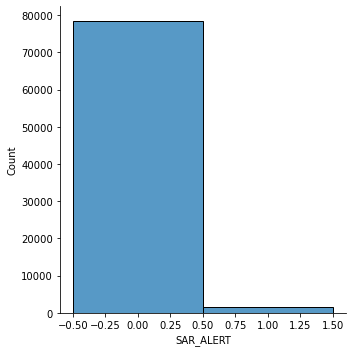

In [5]:
sns.displot(df, x="SAR_ALERT",discrete=True)

In [5]:
# summarize class distribution
from collections import Counter
counter = Counter(df['SAR_ALERT'])
print(counter)

Counter({0: 78441, 1: 1691})


In [11]:
# define the undersampling method: TomekLinks
# 自多數派樣本中，刪除最近點為少數派樣本者
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()

In [25]:
# transform the dataset
X = df.iloc[:, 1:-1]
y = df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)

In [26]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 78198, 1: 1691})


In [35]:
Tamok_df = pd.concat([X,y], axis=1, ignore_index=False)
Tamok_df

,CONFIRM_YN_N,CONFIRM_YN_NA,CONFIRM_YN_Y,COMPLEX_CS_FG_N,COMPLEX_CS_FG_NA,COMPLEX_CS_FG_Y,AUTHORIZED_N,AUTHORIZED_NA,AUTHORIZED_Y,BEARER_SHARE_N,...,CMFCUS1_BUSINESS_CODE,RISK_LEVEL,JOB_RISK,CMFCUS25_SP_RATING,CMFCUS25_MOODYS_RATING,CMFCUS25_SRT_SP_RATING,CMFCUS25_SRT_MOODYS_RATING,CMFCUS25_SRT_FITCH_RATING,NA count,SAR_ALERT
0,0,0,1,1,0,0,1,0,0,0,...,2,3,2,0,0,0,0,0,10,0
1,0,0,1,0,1,0,1,0,0,0,...,2,2,1,0,0,0,0,0,12,0
2,0,1,0,0,1,0,1,0,0,0,...,3,3,3,0,0,0,0,0,11,0
3,0,0,1,1,0,0,0,1,0,1,...,1,2,3,0,0,0,0,0,12,0
4,0,0,1,1,0,0,1,0,0,1,...,2,2,2,0,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79884,0,0,1,0,1,0,0,1,0,1,...,1,2,3,0,0,0,0,0,16,0
79885,0,0,1,1,0,0,1,0,0,0,...,2,3,3,0,0,0,0,0,13,0
79886,0,0,1,1,0,0,0,1,0,0,...,1,3,3,0,0,0,0,0,14,0
79887,0,1,0,1,0,0,0,1,0,0,...,2,2,3,0,0,0,0,0,14,0


In [36]:
Tamok_df.to_csv("Tamok_df.csv")

In [38]:
# define the undersampling method: NM-T
# NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
# NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
# NearMiss-3: Majority class examples with minimum distance to each minority class example.

# undersample = NearMiss(version=T, n_neighbors=k)

from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)

X = df.iloc[:, 1:-1]
y = df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 1691, 1: 1691})


In [ ]:
# 看起來 NM-T 是會自動迭代到 0、1 完全平衡為止
# 1: 對每一多數派樣本，計算其至最近三(k)個少數派樣本的平均距離，只留下平均距離最小者 (加強決策邊界 = 減少冗餘的多數派資料)
# 2: 對每一多數派樣本，計算其至最遠三(k)個少數派樣本的平均距離，只留下平均距離最小者 (加強兩類在空間上的差異 = 減少混淆)
# 3: 對每一個少數派樣本，保留離其最近的多數派樣本 (加強決策邊界)

In [39]:
NM2_df = pd.concat([X,y], axis=1, ignore_index=False)
NM2_df.to_csv("NM2_df.csv")

In [40]:
# define the undersampling method: ENN
# 針對多數派樣本，若該樣本的 KNN 多數決非多數派便刪除之

from imblearn.under_sampling import EditedNearestNeighbours
undersample = EditedNearestNeighbours(n_neighbors=3)

X = df.iloc[:, 1:-1]
y = df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 76544, 1: 1691})


In [41]:
ENN_df = pd.concat([X,y], axis=1, ignore_index=False)
ENN_df.to_csv("ENN_df.csv")

In [46]:
# define the undersampling method: One-Sided Selection for Undersampling (OSS)
# Tamok Links + Condensed Nearest Neighbor (CNN = 濃縮式最近鄰分類器)
# CNN (k=1): 以 KNN 的邏輯，隨機選定一筆樣本作為起始 Prototype 資料，
# 其餘樣本依序照 KNN 邏輯檢視，若屬於現有分類則被吸收消滅，若不屬於則成為新分類
# n_seeds_S 有待進一步了解

from imblearn.under_sampling import OneSidedSelection
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

X = df.iloc[:, 1:-1]
y = df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 59419, 1: 1691})


In [45]:
OSS_df = pd.concat([X,y], axis=1, ignore_index=False)
OSS_df.to_csv("OSS_df.csv")

In [ ]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [6]:
# SMOTE: 在少數派樣本連線之間創造出新的少數派樣本

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X = df.iloc[:, 1:-1]
y = df['SAR_ALERT']
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 78441, 1: 78441})


In [47]:
# 下一步：如何將其中距離公式改成 Hamming?
# 考量：但我們目前轉換後資料還混合著類別跟序列型資料 (犧牲序列型為類別型=Dummy?)
# 類別自己作 x 序列自己作 begging在一起
# 先(非監督)分群 再將子群分別訓練監督模型
# 其他分群：遺失值多 / 資料齊全

In [ ]:
# 方案一:監督(性質對行為) 方案二:時間序列(性質變動對行為) 方案三:非監督(分群)
# 1. SAR/ALERT (交易行為) 跟 主管機關在意之個體風險 (靜態性質) 是兩件事，應分開考量 (前者:性質跟實際行為之關聯、後者:性質之間的關聯)
# 1-2. 靜態性質的變動
# 2. 資料集切分(子集)、變數篩選(Lasso、降維)、變數轉換要有規則
# 3. 研究方法：變數轉換 & 遺失補值 --> 變數篩選 --> 重採樣 --> 資料切分(數值/類別) --> 模型訓練(begging)